In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import pandas as pd

# Chapter 6 in the Book

## Create two empty vectors, x1 and x2. Now do a for loop 100 times, where you for each iteration: 
## 1) Take the mean of 100 samples from $N(10, 5)$ and store it in x1. 
## 2) Take the mean of 100 samples from $N(10, 20)$ and store it in x2.

## So, your vectors x1 and x2 should contain 100 values. 

## From p.148 in the book, we know that the mean is an unbiased estimate of the fixed, but unknown $\mu$. The nice thing is that in our Monte Carlo Simulation we know the true $\mu$. Plot histograms of x1 and x2 and comment on the result, do we on "average" get the right mean? Is it easier or harder to estimate the mean when the variance is low/high? How is this knowledge useful in reality?

In [47]:
# plotting function
def plot_it(ax, x, bins, ymax, xlim_min, xlim_max):    
    axs[ax].set_title('Distribution of values, with known µ and σ. Sample size: 100x100')
    axs[ax].set_xlabel('Values')
    axs[ax].set_ylabel('Number of times occured')
    axs[ax].set_xlim((xlim_min,xlim_max))

    axs[ax].vlines(µ, ymin=0, ymax=ymax, label=f'x̄ = {round(x.mean(),2)}', colors='red')
    axs[ax].vlines(x.min(), ymin=0, ymax=ymax, label=f'min = {round(x.min(),2)}', colors='orange')
    axs[ax].vlines(x.max(), ymin=0, ymax=ymax, label=f'max = {round(x.max(),2)}', colors='orange')
    axs[ax].hlines(ymax, xmin=x.min(), xmax=x.max(), label=f'd = {round(x.max()-x.min(),2)}', colors='brown')
    #axs[ax].axvspan(x.min(), x.max(), alpha=0.1)
    
    axs[ax].hist(x, bins=bins)
    axs[ax].legend()

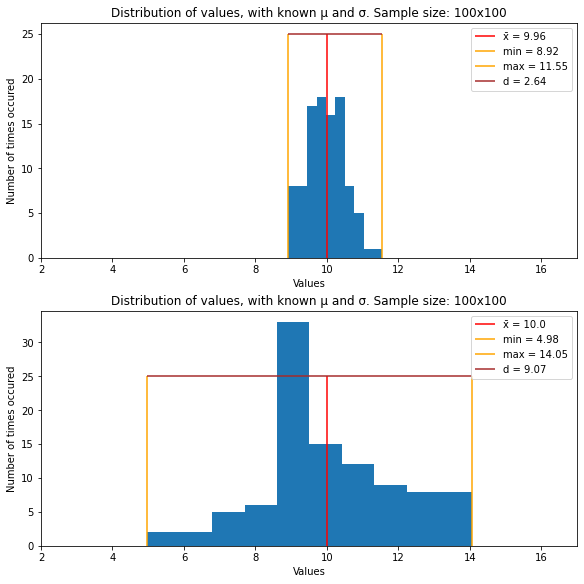

In [48]:
µ = 10
σ1 = 5
σ2 = 20

x1 = np.random.normal(loc = µ, scale = σ1, size = (100, 100)).mean(axis=1)
x2 = np.random.normal(loc = µ, scale = σ2, size = (100, 100)).mean(axis=1)

fig, axs = plt.subplots(2, 1,figsize= (8,8), layout='constrained')

plot_it(0, x1, 10, 25, 2, 17)
plot_it(1, x2, 10, 25, 2, 17)

# Do we get the right mean on average?

In [49]:
# Mean of the 2 datasets
print(x1.mean())
print(x2.mean())

9.960195584916816
10.000551673600258


The sample mean of the two datasets are similar, which is no suprise as the data was generated from the same µ population parameter.

### Occurences of the µ parameter in the generated data
**How often did we get a value around the population mean?**

In [51]:
x1_occurences, x1_vals = np.unique(np.rint(x1), return_counts=True)
x2_occurences, x2_vals = np.unique(np.rint(x2), return_counts=True)

In [52]:
occurences1_df = pd.DataFrame({'values': x1_occurences, 'occurences': x1_vals}, columns=('occurences', 'values'))
occurences1_df.set_index('values', inplace=True)
occurences1_df

,occurences
values,
9.0,20
10.0,66
11.0,13
12.0,1


### In the first dataset, after rounding the numbers, we can see that we have little spread (from here on standard deviation = std), and we mostly got close to the population mean (µ = 10) 

In [53]:
occurences2_df = pd.DataFrame({'values': x2_occurences, 'occurences': x2_vals}, columns=('occurences', 'values'))
occurences2_df.set_index('values', inplace=True)
occurences2_df

,occurences
values,
5.0,1
6.0,3
7.0,4
8.0,6
9.0,34
10.0,16
11.0,13
12.0,11
13.0,8


### In the second dataset, after rounding the numbers, we can see that we have quite large std, and the majority of the values concentrate around the population mean (µ = 10), but because of the spread, we get the neighbouring values quite often as well.

# Comment

The spread of x2 is bigger than x1. 

The population µ parameter is the modus of the  x1 dataset (after rounding to integer). 
In x2, we get the population µ parameter way less times compared to x1, because of the large standard deviation / spread of our datapoints, so it is harder to estimate the true population mean µ when we have high standard deviation in a sample.

Naturally, both x1, and x2 has a mean close to µ(=10).

## Redo the same analysis as above but with 10000 generated samples and see if there is any difference (copy the code from above). Comment on the results. 

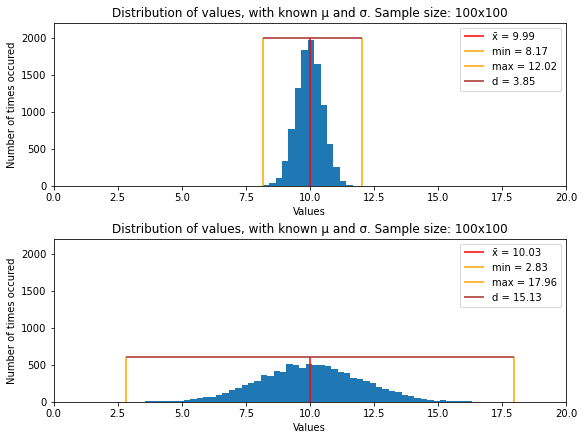

In [63]:
µ = 10
σ1 = 5
σ2 = 20

x1 = np.random.normal(loc = µ, scale = σ1, size = (10000, 100)).mean(axis=1)
x2 = np.random.normal(loc = µ, scale = σ2, size = (10000, 100)).mean(axis=1)

fig, axs = plt.subplots(2, 1,figsize= (8, 6), layout='constrained')

axs[0].set_ylim(ymin=0, ymax=2200)
axs[1].set_ylim(ymin=0, ymax=2200)
plot_it(0, x1, np.arange(min(x1), max(x1) + 0.25, 0.25), 2000, 0, 20)
plot_it(1, x2, np.arange(min(x2), max(x2) + 0.25, 0.25), 600, 0, 20)

# Comment

Because of the high number of samples, the Central Limit Theorem is getting to work:
The large number of samples means (10000) with same distribution (normal distribution) becomes normally ditributed.

There are some differences between the two distributions though.
While both look like normally distributed and they both have the same mean, the first dataset has a smaller std, which results in a positive kurtosis, more 'pointy' curve, the second dataset has larger std, which results in a negative kurtosis, more 'flattened' curve.

# Chapter 7 - Confidence Intervals

Assuming $X$ is $N(10, 3)$, we know (see example calculation below) that a random sample x will with probability 95% be between: <br>
ci_lower = 10 - 1.96 x 3 <br> and <br>
ci_upper = 10 + 1.96 x 3

Example, for the ci_upper, we do the following calculation: $P(X > ci\_upper) = P(X > 10 + 1.96 * 3) = P(Z > 1.96) = 0.025$ where we used the usual standardization. 

This means that if you get observations from the normal distribution above, you would "expect" 95 \% of them to be between ci_lower and ci_upper. 

Your task is now to simulate 10, 100, 1000 and 10000 normally distributed samples from $N(10, 3)$ and check the relative frequency (\%) of how many samples fall outside the confidence interval. How many \% should it theoretically be?

In [22]:
ci_lower = 10 - 1.96*3
ci_upper = 10 + 1.96*3

print(ci_lower)
print(ci_upper)

4.12
15.879999999999999


In [60]:
def dist(µ, σ, n, z):
    dist = np.random.normal(loc=µ, scale=σ, size=n)
    ci = z*σ
    lower = µ - ci
    upper = µ + ci
    under = np.where(dist<lower, 1, 0)
    over = np.where(dist>upper, 1, 0)
    return (sum(under)+sum(over) ,round(((sum(under)+sum(over))/n)*100, 2), dist, upper, lower)

In [61]:
µ = 10
σ = 3

n1 = 10
n2 = 100
n3 = 1000
n4 = 10000

perc1 = dist(µ, σ, n1, 1.96)
perc2 = dist(µ, σ, n2, 1.96)
perc3 = dist(µ, σ, n3, 1.96)
perc4 = dist(µ, σ, n4, 1.96)

result = pd.DataFrame([[perc1[0], perc1[1]], [perc2[0], perc2[1]], [perc3[0], perc3[1]], [perc4[0], perc4[1]]], index= [n1, n2, n3, n4], columns= ['# of samples outside of the 95% confidence interval', '% of samples outside of the 95% confidence interval'])

result

,# of samples outside of the 95% confidence interval,% of samples outside of the 95% confidence interval
10,0,0.00
100,9,9.00
1000,58,5.80
10000,499,4.99


### The above example visualized

In [58]:
def plot_it2(data, pos, bins):
    axs[pos].set_title(f'Normal distribution {data[2].shape[0]} samples')
    axs[pos].set_xlim((0,20))
    axs[pos].axvspan(data[3], data[4], alpha=0.1, label='95% confidence interval')
    axs[pos].legend(loc='center', bbox_to_anchor=(0.5, -0.15), shadow=False, ncol=2)
    axs[pos].hist(data[2], bins=bins)

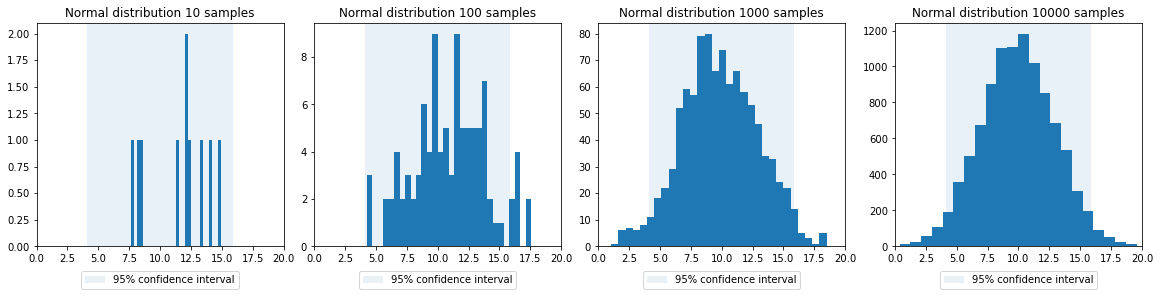

In [59]:
fig, axs = plt.subplots(1, 4, figsize=(16,4), layout='constrained')
bins = 30

plot_it2(perc1, 0, bins)   
plot_it2(perc2, 1, bins)
plot_it2(perc3, 2, bins)
plot_it2(perc4, 3, bins)

### Theoretically we should get 95% of the samples within the confidence intervals, and 5% outside of them.
**The more samples we have, the more the number of samples which fall outside of the confidence interval will stabilize around 
the 5% theoretical level.**

**With infinite samples, there will be exactly 5% of the values which fall outside of the confidence intervals.**

# ---------------------------------------------------------------------------------------------------------------

## Assume you have 100 observations from N(10, 3), you calculate a confidence interval and check if it "captures" the real $\mu$ (we know the reality since we are doing a monte carlo simulation), how often do you "capture" the real mu (in \%) when you repeat this 1000 times? How is this knowledge useful in reality?

## Note, the difference between this question and the one above is that here we calculate the sample mean and sample standard deviation to construct confidence intervals whereas above we used that we "knew the reality" ($\mu$ and $\sigma$), i.e. ci_lower <- 10 - 1.96*3 and  ci_upper <- 10 + 1.96*3. Obviosuly, this is not the case in reality.


# This is uesful because we know if we have a big enough smaple than we can estimate the expected value of a population with a desired confidence level.

In [5]:
times = 1000
n = 100
µ = 10
σ = 3
z = 1.96

observations = np.random.normal(loc = µ, scale = σ, size = (times, n))
observations_mean = observations.mean(axis = 1)
observations_s = np.std(observations, axis = 1, ddof=1)
se = observations_s/(n**0.5)

# alternatively standard error of mean:
# scipy.stats.sem(observations, axis = 1)

ci_lower = observations_mean - z*se
ci_upper = observations_mean + z*se

between = ((ci_lower<10)&(ci_upper>10))

result = pd.DataFrame([[sum(between), sum(between)/times], [times-sum(between), (times-sum(between))/times]], index= ['interval catching µ', 'interval NOT catching µ'], columns=['#','%'])
result

,#,%
interval catching µ,943,0.943
interval NOT catching µ,57,0.057


# Visualized 

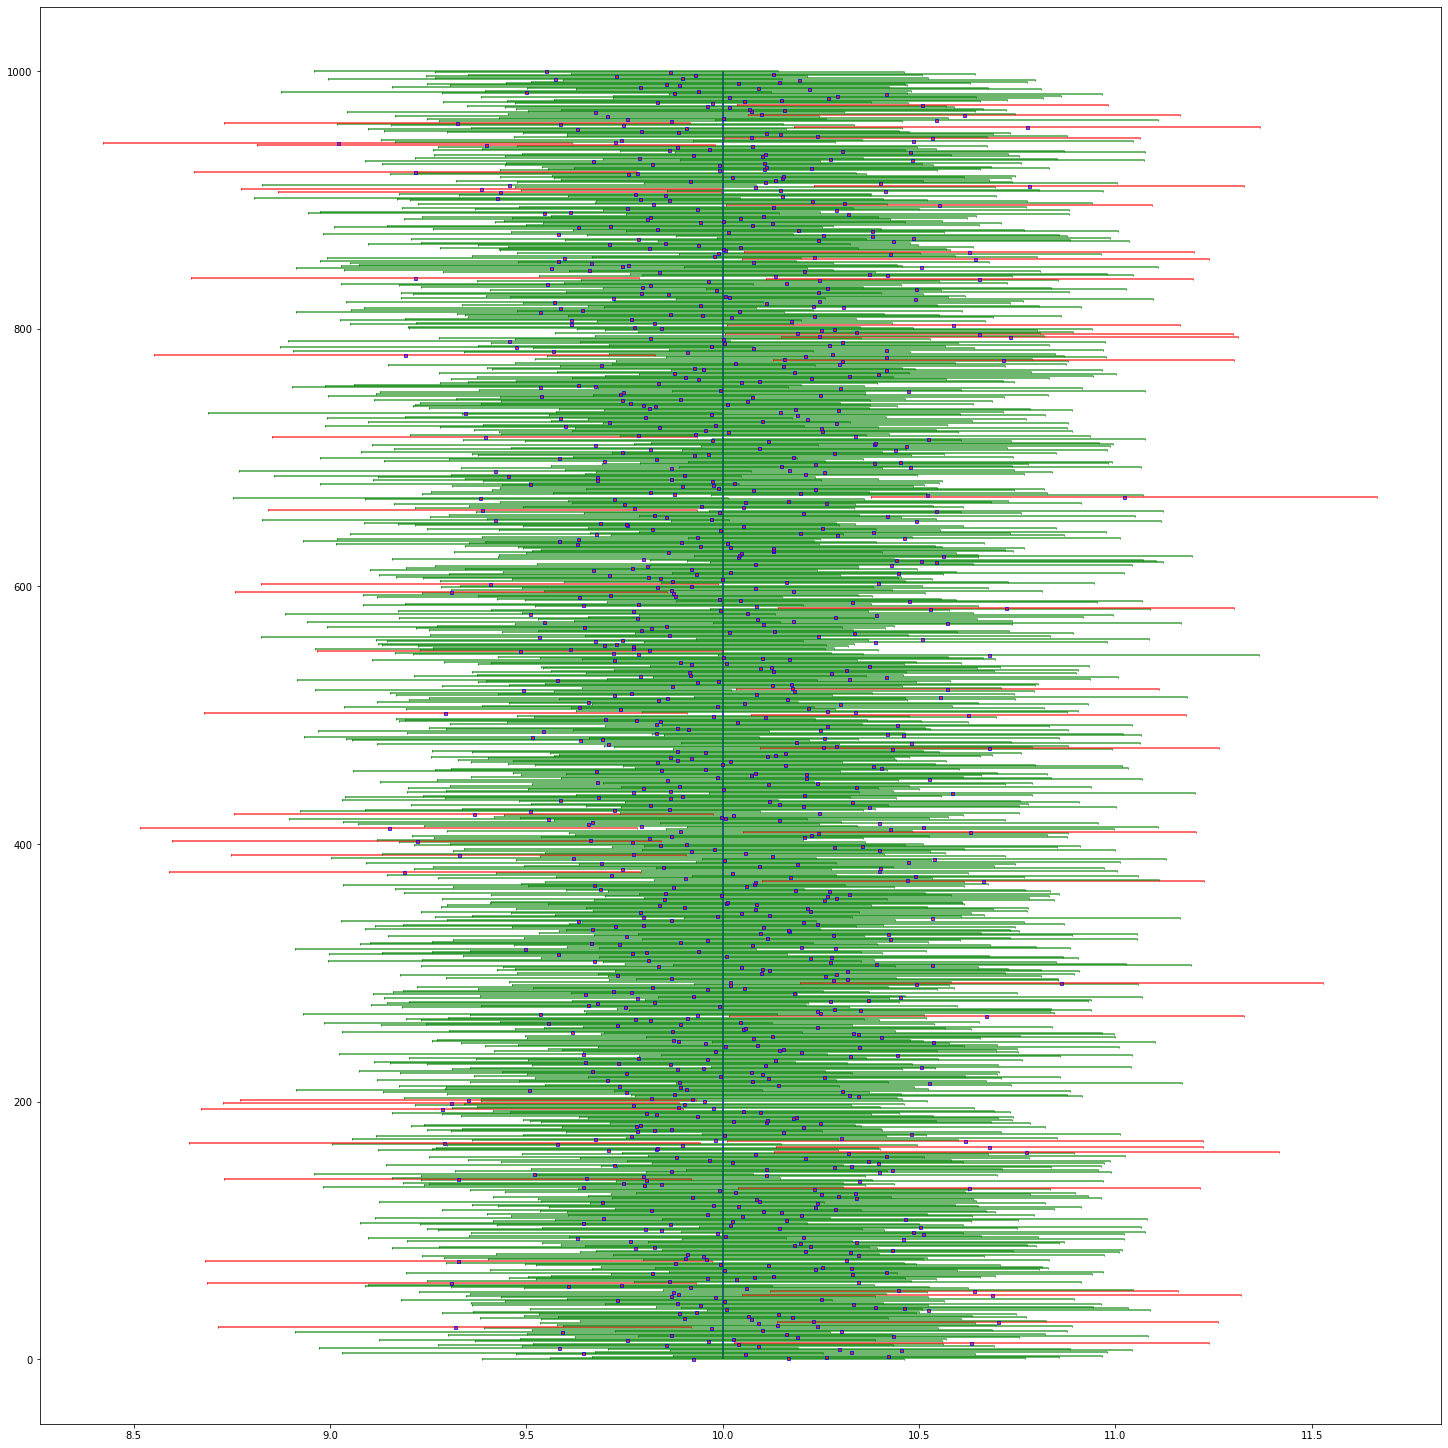

In [12]:
y = np.linspace(start=0, stop=times, num=times)
color_mask = list(np.where(between, 'g', 'r'))
xerrs = ci_upper - ci_lower
constant_color = 'grey'

# observations_mean.sort()

fig, ax = plt.subplots(figsize=(20,20), layout='constrained')

ax.vlines(x=10, ymin=0, ymax=times, colors='b')

for interval in range(len(observations_mean)):
    ax.errorbar(x=observations_mean[interval], y=y[interval], xerr=xerrs[interval]/2, ecolor=color_mask[interval], capsize=1,
        linestyle="None", mfc='red', mec='blue',
        marker="s", markersize=3, alpha=0.75)

## Confidence Intervals for proportions. 
So far, we have looked at confidence intervals for $\mu$. Often, we are also interested in proportions, $\pi$, this is for instance the case in elections that get much attention at TV and "nyhetsmorgon". 

## Assume we ask 1000 people who they will vote for and 4.2% answer Centerpartiet (C). Create a 90% Confidence Interval to get the proportion that would vote for C if we surveyed the whole population ("Totalundersökning"). OBS: note we want a 90% confidence interval.

In [19]:
# home brewn module ;)
import KI

In [20]:
p = 4.2/100
ci = 90
n = 1000

result = KI.ki_p(ci=ci, p=p, n=n)
print(f'Result: {result}')

print('\nThe true population proportion who would vote for C is between 3.16% and 5.24% at a 90% confidence level.')

Result: 4.2 +/- 1.04 = 3.16 <---> 5.24

The true population proportion who would vote for C is between 3.16% and 5.24% at a 90% confidence level.


## For this question see (p. 177 - 178) in the book. We ask 1000 people who they will vote for, 4.2% answer Centerpartiet (C) and 4.5% answer Liberalerna (L), is there a statistical significant difference between the two parties? 

## Check if the assumption on  np(1-p) > 5 is satisfied for both poportions.

In [459]:
# Function for checking if the assumption on np(1-p) > 5 is satisfied
def greater_than_5_check(n,p):
    return n*p*(1-p)>5

# Note: assuming that the desired confidence level is 95% as it was not specified in the description

In [461]:
ci = 95
n = 1000
p_c = 4.2/100
p_l = 4.5/100

print(f'Var(c)>?5 : {greater_than_5_check(n=n, p=p_c)}')
print(f'Var(l)>?5 : {greater_than_5_check(n=n, p=p_l)}\n')

result = KI.ki_diff_p(ci=ci, p1=p_l, p2=p_c, n1=1000, n2=None)
print(f'Result: {result}')

print('\nThere is no statistically significant difference between Centerpartiets and Libelarelnas support in the population,\n\
at a 95% confidence level, because the difference interval lays within the margin of error.')

Var(c)>?5 : True
Var(l)>?5 : True

Result: 0.003% +/- 0.018 = -0.015, 0.021

There is no statistically significant difference between Centerpartiets and Libelarelnas support in the population,
at a 95% confidence level, because the difference interval lays within the margin of error.


# Chapter 8 - Hypothesis Testing
In the code below, can we reject the hypothesis that $\mu = 5$ ? Can we reject the hypothesis that $\mu = 0$ ? How do you interpret the p-value?

Read the following documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html to understand the function. 

In [29]:
x = scipy.stats.norm.rvs(loc = 0, scale = 4, size = 100)

In [31]:
print(scipy.stats.ttest_1samp(x, 5))

Ttest_1sampResult(statistic=-11.860954973656643, pvalue=1.0179211873506776e-20)


# Assuming α = 5% ==> α = 0.05

In this first test:

H0: µ=5

H1: µ!=5

p-value = 1.0179211873506776e-20 ==> 0.0000000000000000000101792118735067756580

**This is an extremely low p-value, which indicates that the evidence against the null hypotheses is strong.
There is a strong evidence against that the true mean is 5, so we reject the hypothesis H0.**

In [33]:
print(scipy.stats.ttest_1samp(x, 0))

Ttest_1sampResult(statistic=-0.29068257828880456, pvalue=0.7719021648598188)


In the second test:

H0: µ=0

H1: µ!=0

pvalue = 0.7719021648598188

**This is a quite high p-value, which indicates that there is very little evidence against the null hypothesis. 
There is little or no evidence that the true mean differs from 0, so we do not reject the H0 hypothesis.**